## Vectorizing Text

In [1]:
import pandas as pd
import spacy
import umap
import numpy as np 
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import sys
sys.path.append("..")
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%load_ext autoreload
%autoreload 2

from ml_editor.data_processing import format_raw_df, get_split_by_author
from ml_editor.data_visualization import plot_embeddings

data_path=Path("D:\Project 1\data\writers.csv")
df=pd.read_csv(data_path)
df=format_raw_df(df.copy())

train_author, test_author = get_split_by_author(df[df["is_question"]])

## TF-IDF on ngrams

In [2]:
questions=train_author[train_author["is_question"]]
raw_text=questions["body_text"]
# Extract a label to use as a color on our plots
# This label does not need to be the same label as the one for the classifier
sent_labels=questions["AcceptedAnswerId"].notna()

sent_labels.value_counts()

AcceptedAnswerId
True     2907
False    2769
Name: count, dtype: int64

In [3]:
# Create an instance of a tfidf vectorizer
# we could use CountVectorizer for a non normalized version

vectorizer=TfidfVectorizer(ngram_range=(1,2), min_df=5, max_features=2**21)

# Fit our vectorizer to questions in our dataset
# Returns an array of vectorized text
bag_of_words=vectorizer.fit_transform(raw_text)

bag_of_words.shape

(5676, 27381)

In [4]:
umap_embedder=umap.UMAP()
umap_bow=umap_embedder.fit_transform(bag_of_words)

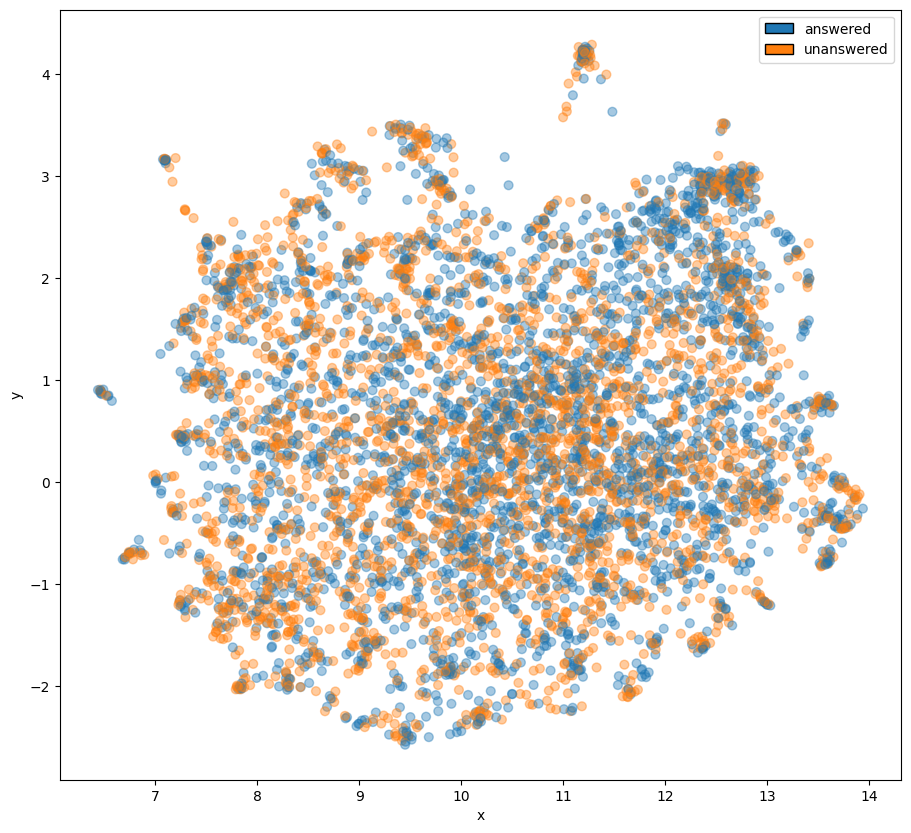

In [5]:
plot_embeddings(umap_bow, sent_labels)

## Pre-trained word Embeddings

In [7]:
nlp = spacy.load('en_core_web_lg', disable=["parser", "tagger", "ner"])


OSError: [E050] Can't find model 'en_core_web_lg'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
spacy_emb=train_author[train_author["is_question"]]["body_text"].apply(lambda x: nlp(x).vector)
embeddings=np.vstack(spacy_emb)

In [ ]:
umap_embedder=umap.UMAP()
umap_emb=umap_embedder.fit_transform(embeddings)

In [ ]:
plot_embeddings(umap_emb, sent_labels)

In [8]:
python -m spacy download en_core_web_lg


SyntaxError: invalid syntax (2606781343.py, line 1)